In [10]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from spectral_connectivity import Multitaper, Connectivity
from spectral_decomposition import spectrum

In [14]:
fs        = 1000.0
durations = [0.1, 0.2, 0.5, 1.0]   # s
TW        = 3.0
K         = int(2*TW - 1)
freqs_of_interest = [12, 30, 50, 80]  # Hz
pval_df = pd.DataFrame(index=durations, columns=freqs_of_interest)

for duration in durations:
    print(duration)
    df_hann_01 = pd.read_csv(f"./data/bias_hann_db {duration}s.csv")
    df_mt_01 = pd.read_csv(f"./data/bias_mt_db {duration}s.csv")

    N = int(fs * duration)
    f_hann, _ = periodogram(np.zeros(N), fs=fs, window='hann',   nfft=N, scaling='density')
    #f_hamm, _ = periodogram(np.zeros(N), fs=fs, window='hamming', nfft=N, scaling='density')
    f_mt      = Connectivity.from_multitaper(
                    Multitaper(np.zeros(N), sampling_frequency=fs,
                                time_halfbandwidth_product=TW, n_tapers=K)
                ).frequencies
    
    target_freqs = [12, 30, 50, 80]
    
    idx_hann = [np.argmin(np.abs(f_hann - f)) for f in target_freqs]
    #idx_hamm = [np.argmin(np.abs(f_hamm - f)) for f in target_freqs]
    idx_mt   = [np.argmin(np.abs(f_mt   - f)) for f in target_freqs]
    
    

    for idx_h, idx_m, freq in zip(idx_hann, idx_mt, target_freqs):
        print(freq)
        hann_bias = df_hann_01[f'Freq_{idx_h}']
        mt_bias = df_mt_01[f'Freq_{idx_m}']

        t_stat, p_value = stats.ttest_ind(hann_bias, mt_bias, equal_var=False)
        pval_df.loc[duration, freq] = p_value


        print("t-statistic:", t_stat)
        print("p-value:", p_value)

        alpha = 0.05
        if p_value < alpha:
            print("Reject H0: Significant difference between the means")
        else:
            print("Fail to reject H0: No significant difference")
        print()

0.1
12
t-statistic: 72.88238032651337
p-value: 0.0
Reject H0: Significant difference between the means

30
t-statistic: -142.60168768562733
p-value: 0.0
Reject H0: Significant difference between the means

50
t-statistic: -26.996074805282113
p-value: 1.3945988855551308e-156
Reject H0: Significant difference between the means

80
t-statistic: -7.1476694449108935
p-value: 9.28457897318568e-13
Reject H0: Significant difference between the means

0.2
12
t-statistic: 88.68515566774731
p-value: 0.0
Reject H0: Significant difference between the means

30
t-statistic: -55.89783950639085
p-value: 0.0
Reject H0: Significant difference between the means

50
t-statistic: 2.774719810723049
p-value: 0.005532745473903572
Reject H0: Significant difference between the means

80
t-statistic: 5.37915296237134
p-value: 7.614571336529646e-08
Reject H0: Significant difference between the means

0.5
12
t-statistic: 60.92323905914852
p-value: 0.0
Reject H0: Significant difference between the means

30
t-stati

In [15]:
pval_df.head()

,12,30,50,80
0.1,0.0,0.0,0.0,0.0
0.2,0.0,0.0,0.005533,0.0
0.5,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0


In [ ]:
t_stat, p_value = stats.ttest_ind(df_hann_01["Freq_1"], df_hann_01["Freq_2"], equal_var=False)

print(p_value)

6.48408957738217e-17


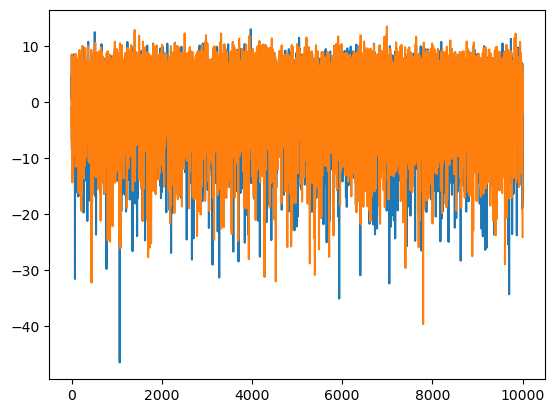

In [19]:
plt.plot(df_hann_01["Freq_1"])
plt.plot(df_hann_01["Freq_2"])
plt.show()
